# Binomial PMF and CDF

In this chapter we explored how we would simulate a binomial variable ($k$ hits) to work out how often we expect $k$ hits on $n$ trials. This is called a **numerical solution** or **simulation**.

There is also an **analytical solution** to calculating the expected number of hits if $k \sim \mathcal{B}(n,p)$. This means, there is an equation we can use to work it out. This equation is called the *probability mass function (PMF)*. In this section we introduce the PMF and a related function, the *cumulative density function (CDF)*, for the binomial distribution.

In practice, you don't need to use the actual equations yourself, as there are built in functions in `scipy.stats` that do it for you. However it is desirable to understand conceptually where the equations 'come from' (how they are derived), as covered in the lecture. 

However you may wish to use the PMF (in Python) to get the probability of a certain value of $k$, rather than simulating it.

### Analytical vs numerical solutions

In this section we see The PMF and CDF are worked out from an equation rather than by random sampling
* Therefore the probability values (eg $p(k<=7)$) given by `stats.binom.pmf()` and `stats.binom.cdf()` never change (for given values of $n,p,k$)
* In contrast the values given by our simluations (how many random samples $k<=7$) did vary slightly each time we ran our simulation

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries



In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

## Binomial PMF

The probability mass function (PMF) tells us the probability of obtaining $k$ hits out of $n$ trials.

The equation for the binomial PMF is as follows: 

$$ p(k=K) = C^{n}_{k} p^k q^{n-k} $$ 

where $p(k=K)$ is the probability of $K$ hits out of $n$ trials, $p$ is the probability of a hit on any given trial, and $q=(1-p)$, and 

$$ C^{n}_{k} = \frac{n!}{k! (n-k)!}$$

... is an expression that accounts for the fact that a even balance of hits and misses is more likely (as discussed in the lecture)

* *Note* unsurprisingly, many people find the notation $p(k=K)$ (which is standard in statistical theory) confusing. In this case $k$ is a *variable* (the number of hits) and $K$ is a specific value of it - so in a coin-tossing example, where we are interested in the chance of getting 8 heads out of 10 tosses, $k$=number of heads and $K$=8; we read $p(k=8)$ as *"the probability the number of heads is 8"*

### PMF (home-baked)

Let's implement the equation for the PDF to get the exact probability that k==8, and compare to the results to the proportion of 10,000 reps in which k==8 (as on the previous worksheet)

In [2]:
# we need the Python library "math" for this code block!
import math 

n=10 # values of n, p, k as in previous exercise
k=8
p=0.5

n_choose_k = math.factorial(n) / (math.factorial(k) * math.factorial(n-k))
prob_k = ((p)**(k)) * ((1-p)**(n-k)) * n_choose_k 
print(prob_k)

0.0439453125


Hopefully this should be roughly the same as the proportion of our 10,000 coin tosses in which k=8 (it wont exactly match, as the simulation was subject to random noise) - let's check!

In [3]:
k = np.random.binomial(10, 0.5, size=10000)
np.mean(k==8)

np.float64(0.0451)

yep, not a bad match!

### PMF (built-in function)

We can also use a built-in function to give the PDF:

In [4]:
stats.binom.pmf(8,10,0.5)

np.float64(0.043945312500000076)

**Comprehension questions**
* Can you work out how to change this to get the probability of 7 heads out of 12 coin tosses? 

In [5]:
# your code here!

* Can you change the code so that the probability of heads is 0.75?

In [6]:
# your code here!

## Binomial CDF

The CDF or cumulative distribution function tells us the probability of obtaining *less than or equal to* $k$ hits in $n$ trials

As we have seen, we often want to know this *cumulative* value - for example if we want to know if a coin is fair, and have observed 8 heads out of 10 coin tosses, we would ask how likely, with a fair coin, we would  get a value as extreme as $k=8$ *or more so* (because we would still conclude the coin was unfair if we got 9 or 10 heads).

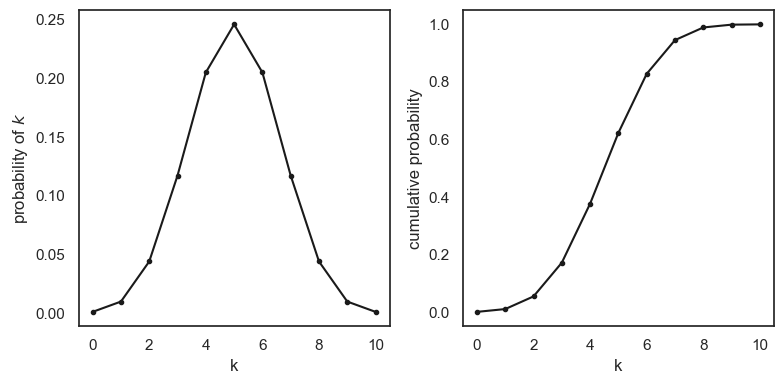

In [7]:
pmf = stats.binom.pmf(range(11),10,0.5)
cdf = stats.binom.cdf(range(11),10,0.5)

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(range(11), pmf, 'k.-')
plt.xlabel('k')
plt.ylabel('probability of $k$')

plt.subplot(1,2,2)
plt.plot(range(11), cdf, 'k.-')
plt.xlabel('k')
plt.ylabel('cumulative probability')


plt.tight_layout()
plt.show()

So we have:
* PMF(8) is the probability of obtaining exactly 7 heads ie $p(k==8)$
* CDF(8) is the probability of obbtaining 8 or fewer heads, ie $p(k<=8)$

### Area under the PMF sums to 1

Noting that the probabilities of all the possible outcomes must sum to 1, we can also say:
* CDF(10) = 1 because we always get 10 or fewer heads in 10 coin tosses

The function CDF always gives us the area under the curve to the *left* of a given value, for example CDF(7) gives us $p(k<=7)$.

If we want to know the probability of getting *more* than (say) 7 heads, we use the fact that the area under the curve sums to 1, so

* $p(k>=8)$ = $1-p(k<8)$ = $1-p(k<=7)$
* $p(k>=8)$ = 1-`cdf(7)`    

Careful here about `>=` vs `>` etc. Since $k$ only takes integer values:

* $p(k<8)$ = $p(k<=7)$
and 
* $p(k>=8)$ = $p(k>7)$

the function `stats.binom.cdf(x)` gives us the probability $p(k<=x)$

**Comprehension questions**

* You will need to choose the correct function (`stats.binom.pmf()` or `stats.binom.cdf()` and the right values of n,p,k to match the numerical answer given in the comments of each cell

In [8]:
# Find the probability of exactly 9 heads out of 12 coin tosses, 
# when the probability of heads is 0.75

# answer = 0.2581

In [9]:
# Find the probability of exactly 5 tails out of 6 coin tosses, 
# when the probability of heads is 0.6

# answer = 0.0386

In [10]:
# Find the probability of at least 7 heads out of 20 coin tosses, 
# when the probability of heads is 0.55

# answer = 0.9785

In [11]:
# Find the probability of fewer than 10 heads out of 20 coin tosses, 
# when the probability of heads is 0.4

# answer = 0.7553

In [12]:
# Find the probability of more than 10 tails out of 15 coin tosses, 
# when the probability of heads is 0.3

# answer = 0.515